In [1]:
# From https://www.tensorflow.org/tutorials/keras/basic_regression

In [22]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.9.0


In [3]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

57344/57026 [==============================] - 0s 3us/step


In [4]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [6]:
print(train_data[0])  # Display sample features, notice the different scales

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [8]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [9]:
# Labels are the house prices in thousands of dollars (mid-1970s prices)
print(train_labels[0:10])  # Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [10]:
# Test data is *not* used when calculating the mean and std.

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0]) # First training sample, normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


# Create the Model

In [12]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                          input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
    
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


# Train the Model

In [13]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS=500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                   validation_split=0.2, verbose=0,
                   callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

# Visualize Model's Training Progress

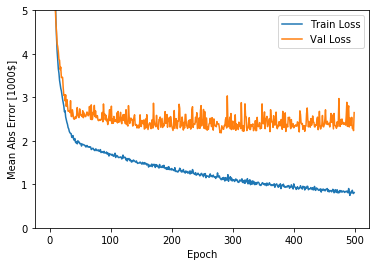

In [16]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
            label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
            label='Val Loss')
    plt.legend()
    plt.ylim([0,5])

plot_history(history)

In [17]:
# Above graph shows little improvement after about 200 epochs.
# Update model.fit to automatically stop training when validation score doesn't improve.


....................................................................................................
....................................................................................

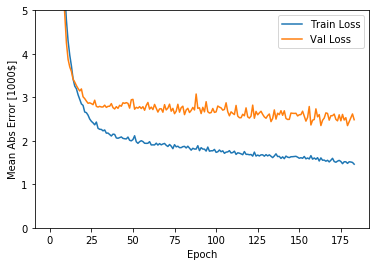

In [18]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                   validation_split=0.2, verbose=0,
                   callbacks=[early_stop, PrintDot()])

plot_history(history)

In [19]:
# graph shows average error is about $2500

In [20]:
# Let's see how model does on test set
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $3038.55


# Predict

In [21]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[ 8.982684  18.573277  20.62273   32.628487  24.012032  20.743683
 24.193039  20.85197   18.287354  21.839935  16.756805  15.503582
 15.01044   40.05222   20.27985   19.663311  24.58636   17.341118
 19.493847  27.761326  11.293044  12.9089365 20.00076   15.442863
 18.539577  24.646843  29.235664  26.004143  11.782723  19.629055
 19.027386  15.475714  31.126743  23.21386   19.324486   8.065234
 16.045044  17.616508  19.53267   23.83068   27.630844  26.136806
 13.693255  39.97025   28.136986  24.382935  25.271328  17.733345
 21.40643   21.812313  32.326355  18.499088  10.791781  15.136428
 32.83549   26.776882  12.283797  45.375504  32.20263   22.113922
 23.890205  15.472915  15.9274845 18.744099  22.865585  19.705418
 13.074988  21.038303  13.710418   6.826394  26.825111  26.736095
 25.210331  14.355797  23.092735  17.87574   18.958042  22.841373
 33.18719   10.328885  20.033512  34.97235   15.1804905 12.341952
 16.269619  18.05764   20.229065  20.970299  19.840416  31.179886
 20.365704